In [3]:
## Importing liabrires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\spn\Desktop\DataAnalysisProjects\Netflix\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

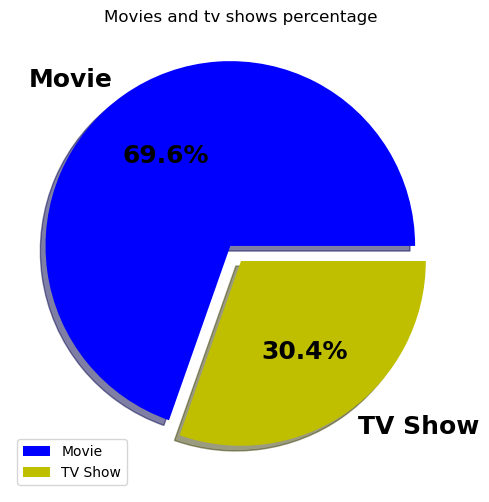

In [8]:
#Percentage of movies and tv shows in netflix
plt.figure(figsize=(12, 6)) 
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 18, 'fontweight': 'bold'}, colors=['b', 'y'], shadow=True) 
plt.title('Movies and tv shows percentage')
plt.legend(loc = 3)
plt.show()

In [9]:
# Finding the year netflix added most content
df['date_added'] = pd.to_datetime(df['date_added'] , errors='coerce')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [10]:
df['date_added_year'] = df['date_added'].dt.year
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0


In [11]:
df.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
date_added_year           float64
dtype: object

In [12]:
df['count'] = 1
date_added_year_summed = df.groupby(df['date_added_year']).sum(numeric_only=True).reset_index()[['date_added_year' , 'count']]

In [13]:
date_added_year_summed.sort_values(['count'] , ascending=False)

,date_added_year,count
11,2019.0,1999
12,2020.0,1878
10,2018.0,1625
13,2021.0,1498
9,2017.0,1164
8,2016.0,418
7,2015.0,73
6,2014.0,23
3,2011.0,13
5,2013.0,10


In [14]:
# finding actor that appeard the most in the dataset
cast_and_title_df = df[['title' , 'cast']]
cast_and_title_df = cast_and_title_df.dropna()

In [20]:
cast_name_counter = {}

for index , row in cast_and_title_df.iterrows() :
    cast_names = row['cast']
    cast_names_split = cast_names.split(',')
    cast_names_striped = [name.strip() for name in cast_names_split]
    for name in cast_names_striped :
        cast_name_counter[name] = cast_name_counter.get(name , 0) + 1
        
dict(sorted(cast_name_counter.items() , key= lambda item:item[1] , reverse=True))

{'Anupam Kher': 43,
 'Shah Rukh Khan': 35,
 'Julie Tejwani': 33,
 'Naseeruddin Shah': 32,
 'Takahiro Sakurai': 32,
 'Rupa Bhimani': 31,
 'Akshay Kumar': 30,
 'Om Puri': 30,
 'Yuki Kaji': 29,
 'Amitabh Bachchan': 28,
 'Paresh Rawal': 28,
 'Boman Irani': 27,
 'Rajesh Kava': 26,
 'Vincent Tong': 26,
 'Andrea Libman': 25,
 'Kareena Kapoor': 25,
 'Samuel L. Jackson': 24,
 'John Cleese': 24,
 'Jigna Bhardwaj': 23,
 'Fred Tatasciore': 23,
 'Tara Strong': 23,
 'Daisuke Ono': 22,
 'Junichi Suwabe': 21,
 'Ajay Devgn': 21,
 'Ashleigh Ball': 21,
 'Kay Kay Menon': 21,
 'Nicolas Cage': 21,
 'Nawazuddin Siddiqui': 21,
 'Adam Sandler': 20,
 'David Attenborough': 20,
 'Salman Khan': 20,
 'David Spade': 19,
 'Yuichi Nakamura': 19,
 'Erin Fitzgerald': 19,
 'Mamoru Miyano': 19,
 'Morgan Freeman': 19,
 'James Franco': 19,
 'Seth Rogen': 19,
 'Ai Kayano': 19,
 'Fred Armisen': 19,
 'Gulshan Grover': 19,
 'Vatsal Dubey': 18,
 'Rajesh Sharma': 18,
 'Fortune Feimster': 18,
 'Diana Kaarina': 18,
 'Yashpal Sharma

In [ ]:
# Summary : About 70% of netflix content are movies , netflix added the most content in 2019 , Anaumap Kher is the actor that appeard the most in netflix content